# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [8]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =f"{url}appid={weather_api_key}&units=metric&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 2 of Set 1 | astaneh-ye ashrafiyeh
Processing Record 3 of Set 1 | saskylakh
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | japura
Processing Record 6 of Set 1 | cape town
Processing Record 7 of Set 1 | arraial do cabo
Processing Record 8 of Set 1 | tasiilaq
Processing Record 9 of Set 1 | sao joao da barra
Processing Record 10 of Set 1 | hithadhoo
Processing Record 11 of Set 1 | goderich
Processing Record 12 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 13 of Set 1 | dikson
Processing Record 14 of Set 1 | virginia beach
Processing Record 15 of Set 1 | bichura
Processing Record 16 of Set 1 | marsh harbour
Processing Record 17 of Set 1 | port hardy
Processing Record 18 of Set 1 | hilo
Processing Record 19 of Set 1 | manggar
Processing Record 20 of Set 1 | mar del plata
Processing Record 21 of S

Processing Record 32 of Set 4 | lazaro cardenas
Processing Record 33 of Set 4 | mitu
Processing Record 34 of Set 4 | illoqqortoormiut
City not found. Skipping...
Processing Record 35 of Set 4 | pisco
Processing Record 36 of Set 4 | plettenberg bay
Processing Record 37 of Set 4 | sosnogorsk
Processing Record 38 of Set 4 | luau
Processing Record 39 of Set 4 | yeppoon
Processing Record 40 of Set 4 | mildura
Processing Record 41 of Set 4 | carutapera
Processing Record 42 of Set 4 | half moon bay
Processing Record 43 of Set 4 | limenaria
Processing Record 44 of Set 4 | sisimiut
Processing Record 45 of Set 4 | chokurdakh
Processing Record 46 of Set 4 | sur
Processing Record 47 of Set 4 | andenes
Processing Record 48 of Set 4 | iquique
Processing Record 49 of Set 4 | general roca
Processing Record 0 of Set 5 | qaanaaq
Processing Record 1 of Set 5 | carnarvon
Processing Record 2 of Set 5 | bethel
Processing Record 3 of Set 5 | barawe
City not found. Skipping...
Processing Record 4 of Set 5 | b

City not found. Skipping...
Processing Record 23 of Set 8 | kamenskoye
City not found. Skipping...
Processing Record 24 of Set 8 | salinopolis
Processing Record 25 of Set 8 | pingzhuang
Processing Record 26 of Set 8 | kahului
Processing Record 27 of Set 8 | barreirinhas
Processing Record 28 of Set 8 | nurota
Processing Record 29 of Set 8 | storm lake
Processing Record 30 of Set 8 | marsa matruh
Processing Record 31 of Set 8 | warqla
City not found. Skipping...
Processing Record 32 of Set 8 | hambantota
Processing Record 33 of Set 8 | yumen
Processing Record 34 of Set 8 | saint anthony
Processing Record 35 of Set 8 | ruatoria
City not found. Skipping...
Processing Record 36 of Set 8 | grand centre
City not found. Skipping...
Processing Record 37 of Set 8 | dalvik
Processing Record 38 of Set 8 | kirensk
Processing Record 39 of Set 8 | qasigiannguit
Processing Record 40 of Set 8 | carlyle
Processing Record 41 of Set 8 | ballina
Processing Record 42 of Set 8 | rawlins
Processing Record 43 

Processing Record 6 of Set 12 | kitimat
Processing Record 7 of Set 12 | am timan
Processing Record 8 of Set 12 | benguela
Processing Record 9 of Set 12 | abu dhabi
Processing Record 10 of Set 12 | pimentel
Processing Record 11 of Set 12 | peno
Processing Record 12 of Set 12 | gizo
Processing Record 13 of Set 12 | huarmey
Processing Record 14 of Set 12 | homer
Processing Record 15 of Set 12 | dunyapur
Processing Record 16 of Set 12 | krasnoselkup
Processing Record 17 of Set 12 | punta alta
Processing Record 18 of Set 12 | daura
Processing Record 19 of Set 12 | waw
Processing Record 20 of Set 12 | deep river
Processing Record 21 of Set 12 | lucea
Processing Record 22 of Set 12 | nantucket
Processing Record 23 of Set 12 | marawi
Processing Record 24 of Set 12 | nizwa
Processing Record 25 of Set 12 | buala
Processing Record 26 of Set 12 | karauzyak
City not found. Skipping...
Processing Record 27 of Set 12 | rocha
Processing Record 28 of Set 12 | bentiu
Processing Record 29 of Set 12 | amb

In [10]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          546
Lat           546
Lng           546
Max Temp      546
Humidity      546
Cloudiness    546
Wind Speed    546
Country       546
Date          546
dtype: int64

In [11]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,astaneh-ye ashrafiyeh,37.2596,49.9444,4.96,91,93,1.23,IR,1680403512
1,saskylakh,71.9167,114.0833,-6.28,87,94,7.74,RU,1680403512
2,rikitea,-23.1203,-134.9692,26.81,81,75,6.40,PF,1680403512
3,japura,-0.3167,102.3500,24.77,91,100,0.75,ID,1680403512
4,cape town,-33.9258,18.4232,17.99,79,0,3.09,ZA,1680403397


In [13]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities2.csv", index_label="City_ID")

In [15]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities2.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,astaneh-ye ashrafiyeh,37.2596,49.9444,4.96,91,93,1.23,IR,1680403512
1,saskylakh,71.9167,114.0833,-6.28,87,94,7.74,RU,1680403512
2,rikitea,-23.1203,-134.9692,26.81,81,75,6.40,PF,1680403512
3,japura,-0.3167,102.3500,24.77,91,100,0.75,ID,1680403512
4,cape town,-33.9258,18.4232,17.99,79,0,3.09,ZA,1680403397


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

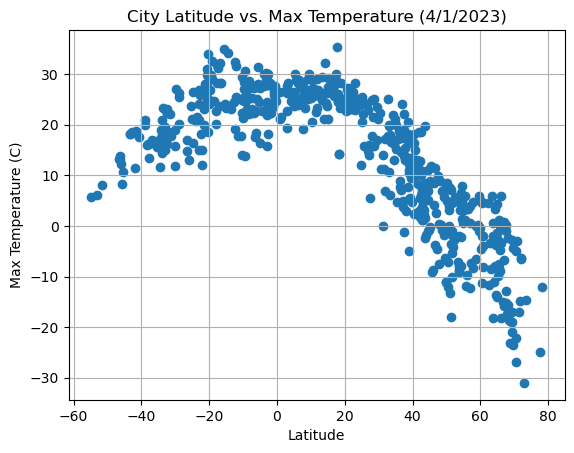

In [18]:
# Build scatter plot for latitude vs. temperature
lat_x=city_data_df["Lat"]
temp_y=city_data_df["Max Temp"]
plt.scatter(lat_x,temp_y)
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()
plt.title("City Latitude vs. Max Temperature (4/1/2023)")

# Save the figure
plt.savefig("../output_data/latxtemp1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

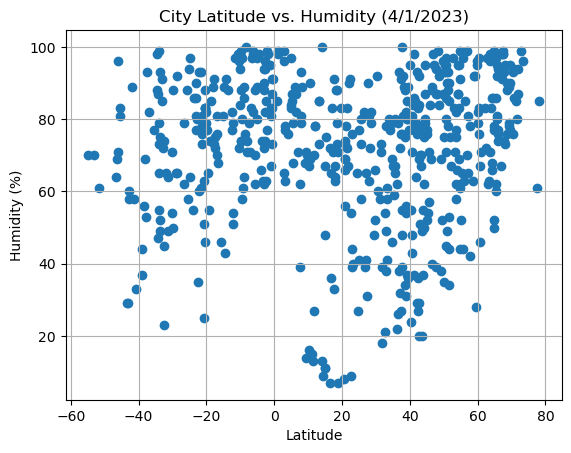

In [20]:
# Build the scatter plots for latitude vs. humidity
humid_y=city_data_df["Humidity"]
plt.scatter(lat_x,humid_y)
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.title("City Latitude vs. Humidity (4/1/2023)")

# Save the figure
plt.savefig("../output_data/latxhumid.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

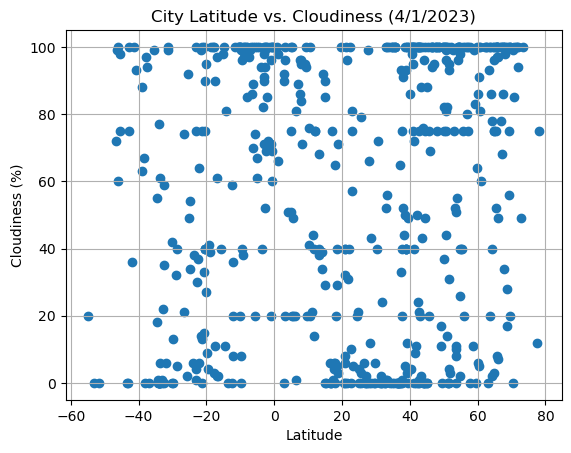

In [23]:
# Build the scatter plots for latitude vs. cloudiness
cloud_y=city_data_df["Cloudiness"]
plt.scatter(lat_x,cloud_y)
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.title("City Latitude vs. Cloudiness (4/1/2023)")

# Save the figure
plt.savefig("../output_data/latxcloud.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

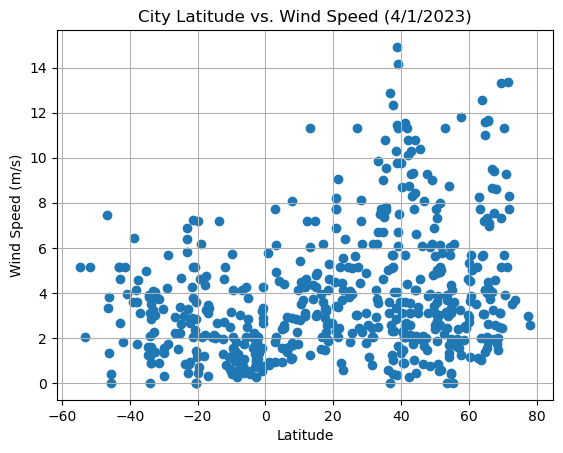

In [24]:
# Build the scatter plots for latitude vs. wind speed
wind_y=city_data_df["Wind Speed"]
plt.scatter(lat_x,wind_y)
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()
plt.title("City Latitude vs. Wind Speed (4/1/2023)")

# Save the figure
plt.savefig("../output_data/latxwind.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [27]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.loc[(city_data_df["Lat"]>=0),:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,astaneh-ye ashrafiyeh,37.2596,49.9444,4.96,91,93,1.23,IR,1680403512
1,saskylakh,71.9167,114.0833,-6.28,87,94,7.74,RU,1680403512
6,tasiilaq,65.6145,-37.6368,-2.91,80,97,1.80,GL,1680403217
9,goderich,43.7501,-81.7165,1.62,55,76,7.72,CA,1680403514
10,dikson,73.5069,80.5464,-14.58,96,100,3.69,RU,1680403514


In [28]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.loc[(city_data_df["Lat"]<0),:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,rikitea,-23.1203,-134.9692,26.81,81,75,6.40,PF,1680403512
3,japura,-0.3167,102.3500,24.77,91,100,0.75,ID,1680403512
4,cape town,-33.9258,18.4232,17.99,79,0,3.09,ZA,1680403397
5,arraial do cabo,-22.9661,-42.0278,24.04,86,1,5.81,BR,1680403513
7,sao joao da barra,-21.6403,-41.0511,23.06,93,99,2.90,BR,1680403513


###  Temperature vs. Latitude Linear Regression Plot

The r-value is:0.7841476016303252


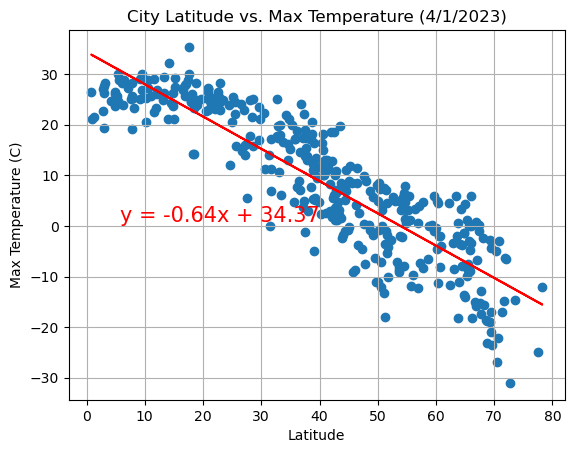

In [33]:
# Linear regression on Northern Hemisphere
nlat_x=northern_hemi_df["Lat"]
ntemp_y=northern_hemi_df["Max Temp"]
plt.scatter(nlat_x,ntemp_y)
(slope, intercept, rvalue, pvalue, stderr) = linregress(nlat_x, ntemp_y)
nlat_temp_regress=nlat_x*slope+intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(nlat_x,nlat_temp_regress,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()
plt.title("City Latitude vs. Max Temperature (4/1/2023)")
print(f'The r-value is:{rvalue*rvalue}')

The r-value is:0.4007737918087763


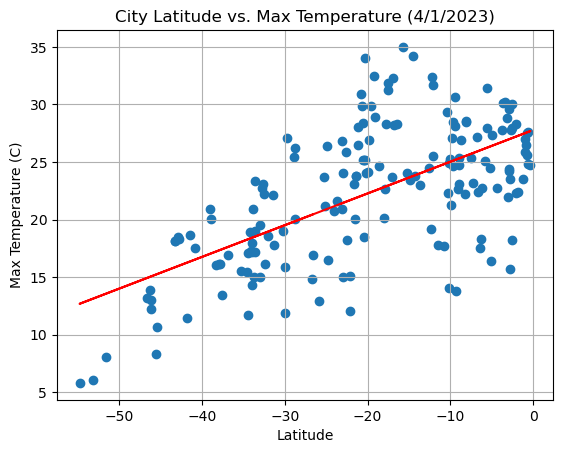

In [34]:
# Linear regression on Southern Hemisphere
slat_x=southern_hemi_df["Lat"]
stemp_y=southern_hemi_df["Max Temp"]
plt.scatter(slat_x,stemp_y)
(slope, intercept, rvalue, pvalue, stderr) = linregress(slat_x, stemp_y)
slat_temp_regress=slat_x*slope+intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(slat_x,slat_temp_regress,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()
plt.title("City Latitude vs. Max Temperature (4/1/2023)")
print(f'The r-value is:{rvalue*rvalue}')

**Discussion about the linear relationship:** It makes sense that there would be a strong correlation for temperatures to get higher closer to the equator they are. Also, as it is spring in the northern hemisphere, for the temperatures to be more dramatic in that region.

### Humidity vs. Latitude Linear Regression Plot

The r-value is:0.06281510213357758


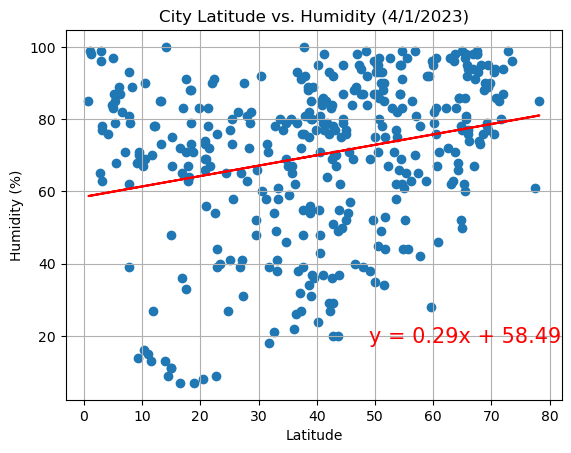

In [56]:
# Northern Hemisphere
nhumid_y=northern_hemi_df["Humidity"]
plt.scatter(nlat_x,nhumid_y)
(slope, intercept, rvalue, pvalue, stderr) = linregress(nlat_x, nhumid_y)
nlat_humid_regress=nlat_x*slope+intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(nlat_x,nlat_humid_regress,"r-")
plt.annotate(line_eq,(49,18),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.title("City Latitude vs. Humidity (4/1/2023)")
print(f'The r-value is:{rvalue*rvalue}')


The r-value is:0.13073160152897811


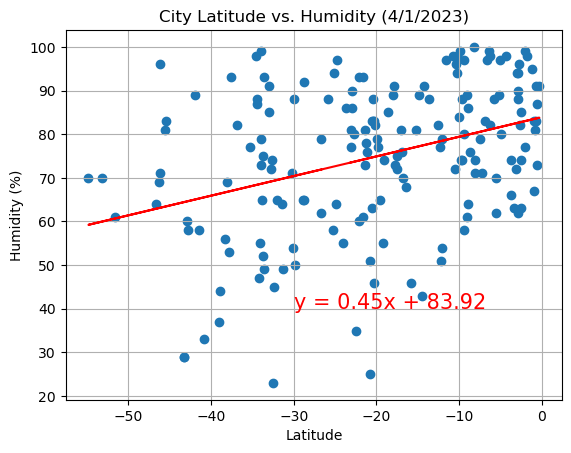

In [55]:
# Southern Hemisphere
shumid_y=southern_hemi_df["Humidity"]
plt.scatter(slat_x,shumid_y)
(slope, intercept, rvalue, pvalue, stderr) = linregress(slat_x, shumid_y)
slat_humid_regress=slat_x*slope+intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(slat_x,slat_humid_regress,"r-")
plt.annotate(line_eq,(-30,40),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.title("City Latitude vs. Humidity (4/1/2023)")
print(f'The r-value is:{rvalue*rvalue}')


**Discussion about the linear relationship:** The r value is weak here, as moisture patterns depend upon much more than simple latitude. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is:0.05403986590648896


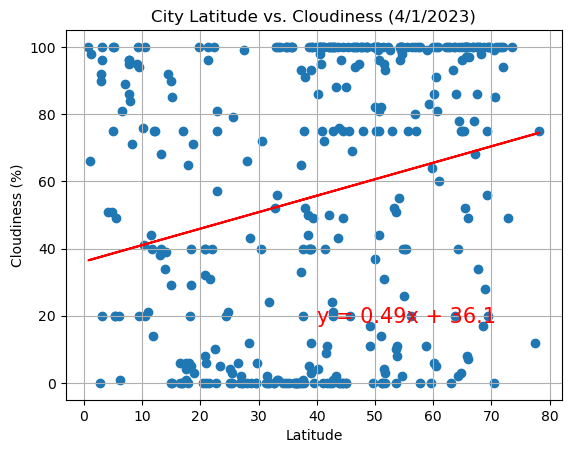

In [50]:
# Northern Hemisphere
ncloud_y=northern_hemi_df["Cloudiness"]
plt.scatter(nlat_x,ncloud_y)
(slope, intercept, rvalue, pvalue, stderr) = linregress(nlat_x, ncloud_y)
nlat_cloud_regress=nlat_x*slope+intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(nlat_x,nlat_cloud_regress,"r-")
plt.annotate(line_eq,(40,18),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.title("City Latitude vs. Cloudiness (4/1/2023)")
print(f'The r-value is:{rvalue*rvalue}')

The r-value is:0.13821319627547396


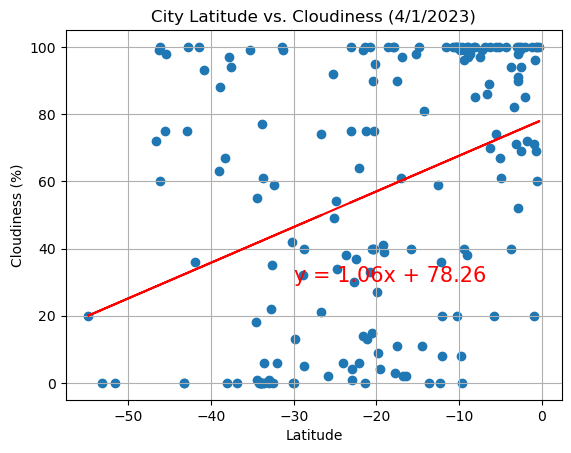

In [51]:
# Southern Hemisphere
scloud_y=southern_hemi_df["Cloudiness"]
plt.scatter(slat_x,scloud_y)
(slope, intercept, rvalue, pvalue, stderr) = linregress(slat_x, scloud_y)
slat_cloud_regress=slat_x*slope+intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(slat_x,slat_cloud_regress,"r-")
plt.annotate(line_eq,(-30,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.title("City Latitude vs. Cloudiness (4/1/2023)")
print(f'The r-value is:{rvalue*rvalue}')

**Discussion about the linear relationship:** There isn't much to see here, as the moisture of weather patterns are dependent on far more than latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is:0.018324297205544425


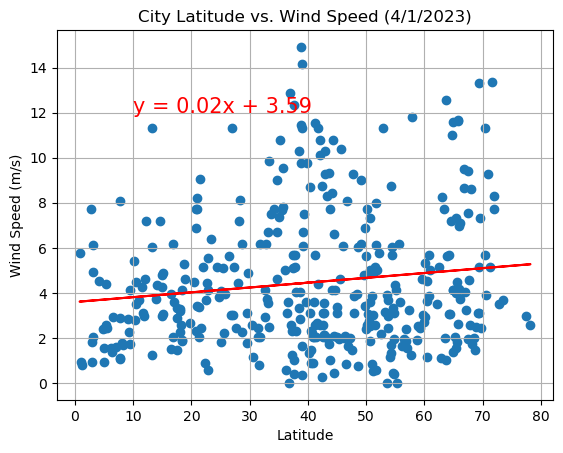

In [52]:
# Northern Hemisphere
nwind_y=northern_hemi_df["Wind Speed"]
plt.scatter(nlat_x,nwind_y)
(slope, intercept, rvalue, pvalue, stderr) = linregress(nlat_x, nwind_y)
nlat_wind_regress=nlat_x*slope+intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(nlat_x,nlat_wind_regress,"r-")
plt.annotate(line_eq,(10,12),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()
plt.title("City Latitude vs. Wind Speed (4/1/2023)")
print(f'The r-value is:{rvalue*rvalue}')

The r-value is:0.09665684047616187


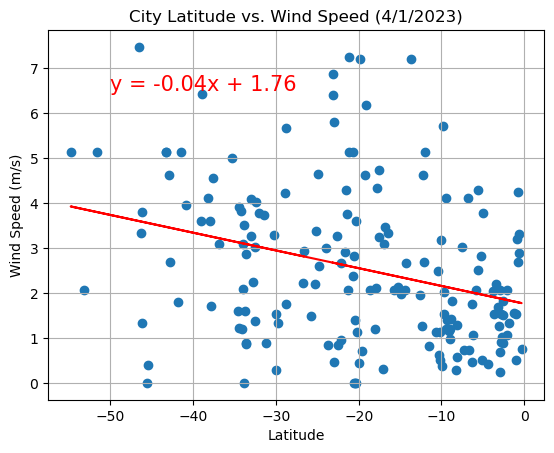

In [54]:
# Southern Hemisphere
swind_y=southern_hemi_df["Wind Speed"]
plt.scatter(slat_x,swind_y)
(slope, intercept, rvalue, pvalue, stderr) = linregress(slat_x, swind_y)
slat_wind_regress=slat_x*slope+intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(slat_x,slat_wind_regress,"r-")
plt.annotate(line_eq,(-50,6.5),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()
plt.title("City Latitude vs. Wind Speed (4/1/2023)")
print(f'The r-value is:{rvalue*rvalue}')

**Discussion about the linear relationship:** The r value  is weak here as well because wind speed depends on more than latitude. 